<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/MultipleLinearRegressionBasicProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 50 Startups
This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

## Objectif:
Predict the profit of startups.

## Import Libraries and dataset

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import opendatasets as od
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
url = 'https://www.kaggle.com/farhanmd29/50-startups'
od.download(url)

Skipping, found downloaded files in "./50-startups" (use force=True to force download)


In [4]:
startup = pd.read_csv('./50-startups/50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# Clean columns
def clean(col):
  return col.replace('R&D Spend', 'RD_Spend').replace(
      'Marketing Spend', 'Marketing_Spend')

startup = startup.rename(columns=clean)
startup.columns


Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [6]:
# Data shape
startup.shape

(50, 5)

In [7]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
startup.duplicated().any()

False

In [9]:
startup.isna().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [10]:
startup.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [11]:
startup.describe().T

,count,mean,std,min,25%,50%,75%,max
RD_Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing_Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [12]:
from sklearn.model_selection import (
    cross_validate,
    ShuffleSplit,
)
from sklearn.preprocessing import (
    StandardScaler, 
    OneHotEncoder
)
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [13]:
data = startup.drop(columns=['Profit'], axis=1)
target= startup.Profit

In [14]:
target.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [15]:
num_features = data.select_dtypes(include='number').columns.tolist()
cat_features = data.select_dtypes(include='object').columns.tolist()
print(num_features)
print(cat_features)

['RD_Spend', 'Administration', 'Marketing_Spend']
['State']


In [16]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
               ('scl', num_transformer, num_features),
               ('encoder', cat_transformer, cat_features),                  
])

In [17]:
model = make_pipeline(preprocessor, LinearRegression())

In [18]:
cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=42)
cv_results = cross_validate(
    model,
    data,
    target,
    scoring='neg_mean_absolute_error',
    cv=cv,
    return_train_score=True,
    n_jobs=-1,
)

In [19]:
cv_results = pd.DataFrame(cv_results)
cv_results = cv_results.assign(
    train_error = -cv_results['train_score'],
    test_error = -cv_results['test_score']
)
cv_results

,fit_time,score_time,test_score,train_score,train_error,test_error
0,0.013946,0.006745,-7395.433532,-6644.554733,6644.554733,7395.433532
1,0.016960,0.005950,-9298.648495,-5396.945427,5396.945427,9298.648495
2,0.011261,0.005943,-9351.288817,-5372.631726,5372.631726,9351.288817
3,0.020905,0.006111,-10704.193906,-5377.481351,5377.481351,10704.193906
4,0.015830,0.006762,-6530.565532,-6923.058904,6923.058904,6530.565532
5,0.010962,0.005981,-7717.571364,-6309.281620,6309.281620,7717.571364
6,0.010273,0.006384,-6045.260037,-7088.669930,7088.669930,6045.260037
7,0.011277,0.006130,-9161.565963,-6145.972965,6145.972965,9161.565963
8,0.010961,0.005873,-7055.850736,-6610.807708,6610.807708,7055.850736
9,0.015368,0.006263,-5880.908598,-7127.224528,7127.224528,5880.908598


In [20]:
scores = cv_results[['train_error', 'test_error']]

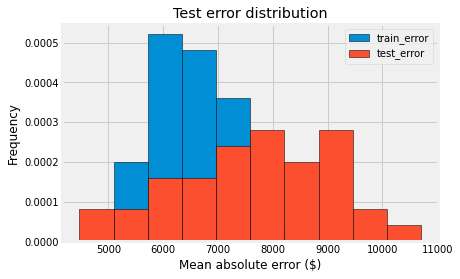

In [21]:
scores.plot.hist(bins=10, edgecolor="black", density=True)
plt.xlabel("Mean absolute error ($)")
_ = plt.title("Test error distribution")

In [22]:
print(f"The mean cross-validated testing error is: "
      f"{cv_results['test_error'].mean():.2f} $")

The mean cross-validated testing error is: 7653.37 $


In [23]:
print(f"The standard deviation of the testing error is: "
      f"{cv_results['test_error'].std():.2f} $")

The standard deviation of the testing error is: 1494.36 $


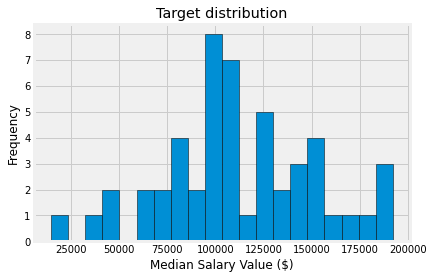

In [24]:
target.plot.hist(bins=20, edgecolor="black")
plt.xlabel("Median Salary Value ($)")
_ = plt.title("Target distribution")

In [25]:
print(f"The standard deviation of the target is: {target.std():.2f} $")

The standard deviation of the target is: 40306.18 $


##  Regularization

In [26]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Mean squared error of linear regression model on the train set:
6424.890 +/- 635.840
Mean squared error of linear regression model on the test set:
7653.375 +/- 1494.359


In [27]:
from sklearn.linear_model import RidgeCV
from  sklearn.preprocessing import PolynomialFeatures

alphas = np.logspace(-2, 0, num=20)
ridge = make_pipeline(preprocessor, PolynomialFeatures(degree=2),
                      RidgeCV(alphas=alphas, store_cv_values=True))

In [28]:
cv = ShuffleSplit(n_splits=10, random_state=42)
cv_results = cross_validate(ridge, data, target,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=-1)